# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import warnings
import gensim
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=70000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (70000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Literacy & Language,Literacy,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [6]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
1,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1,329.00,1,Literacy_Language,Literacy,Having a class of 24 students comes with diver...


In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[29999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Tell me and I forget, teach me and I may remember, involve me and I learn.\" -Benjamin Franklin. In my classroom, I strive to inspire daily. I teach my students to believe in succeeding, to believe in themselves. The power of education is limitless. My students are the future.\r\n\r\nMy school is located near a large military base, and although many students come to me from diverse backgrounds, they always have one thing in common, an eagerness to learn. \r\nApproximately 547 children attend my school and identify mostly as Multiracial; Black, non-Hispanic; and Asian. 100% of the 547 students here receive free breakfast and lunch. We are also a Title I school with at least 40% of a school is students coming from low-income families. Our school is a well maintained school with a loving, caring administrator, as well as teachers and support staff who do everything within their power to see that the needs of the students are met.My students frequently complain about sitting still for to l

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Tell me and I forget, teach me and I may remember, involve me and I learn.  -Benjamin Franklin. In my classroom, I strive to inspire daily. I teach my students to believe in succeeding, to believe in themselves. The power of education is limitless. My students are the future.    My school is located near a large military base, and although many students come to me from diverse backgrounds, they always have one thing in common, an eagerness to learn.   Approximately 547 children attend my school and identify mostly as Multiracial; Black, non-Hispanic; and Asian. 100% of the 547 students here receive free breakfast and lunch. We are also a Title I school with at least 40% of a school is students coming from low-income families. Our school is a well maintained school with a loving, caring administrator, as well as teachers and support staff who do everything within their power to see that the needs of the students are met.My students frequently complain about sitting still for to long and

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Tell me and I forget teach me and I may remember involve me and I learn Benjamin Franklin In my classroom I strive to inspire daily I teach my students to believe in succeeding to believe in themselves The power of education is limitless My students are the future My school is located near a large military base and although many students come to me from diverse backgrounds they always have one thing in common an eagerness to learn Approximately 547 children attend my school and identify mostly as Multiracial Black non Hispanic and Asian 100 of the 547 students here receive free breakfast and lunch We are also a Title I school with at least 40 of a school is students coming from low income families Our school is a well maintained school with a loving caring administrator as well as teachers and support staff who do everything within their power to see that the needs of the students are met My students frequently complain about sitting still for to long and request to take a break These 

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.lower().split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 70000/70000 [00:45<00:00, 1545.30it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'tell forget teach may remember involve learn benjamin franklin classroom strive inspire daily teach students believe succeeding believe power education limitless students future school located near large military base although many students come diverse backgrounds always one thing common eagerness learn approximately 547 children attend school identify mostly multiracial black non hispanic asian 100 547 students receive free breakfast lunch also title school least 40 school students coming low income families school well maintained school loving caring administrator well teachers support staff everything within power see needs students met students frequently complain sitting still long request take break short breaks commonly referred brain breaks include simple exercise students complete behind desks time brain breaks typically short time length due restrictions classroom setting brain breaks welcomed students always request complete go noodle fitness activities typically take bit 

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[29999])
print("="*50)

Engineering STEAM into the Primary Classroom
There's Only One You in This Great Big World
Literature Rich Interdisciplinary Lesson Supplies Cont.
Targeting and tracking virtual physical fitness.
Second Grade Does the Wobble: Flexible Seating Options


In [21]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.lower().split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 70000/70000 [00:02<00:00, 31557.42it/s]


In [22]:
# after preprocesing
print(preprocessed_project_title[0])
print("="*50)
print(preprocessed_project_title[50])
print("="*50)
print(preprocessed_project_title[10000])
print("="*50)

engineering steam primary classroom
need writing supplies
visualizing art without visual crutches


In [23]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.5 Preparing data for models

In [24]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price_x', 'quantity_x', 'clean_categories', 'clean_subcategories',
       'essay', 'price_y', 'quantity_y'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

## Train/Test Split and Cross Validation 

In [25]:
#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# create training and testing vars
X=project_data
Y=project_data['project_is_approved']
project_data.drop(['project_is_approved'], axis = 1, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, stratify = Y )
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.30, stratify=Y_train)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
print(X_cv.shape, Y_cv.shape)

(34300, 21) (34300,)
(21000, 21) (21000,)
(14700, 21) (14700,)


## project_subject_categories

In [26]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
X_train_categories_one_hot = vectorizer.fit_transform(X_train['clean_categories'].values)
X_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
X_cv_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
print("After vectorizations")
print(X_train_categories_one_hot.shape, Y_train.shape)
print(X_cv_categories_one_hot.shape, Y_cv.shape)
print(X_test_categories_one_hot.shape, Y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(34300, 9) (34300,)
(14700, 9) (14700,)
(21000, 9) (21000,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


## Project_subject_subcategories

In [27]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_sub_categories_one_hot = vectorizer.fit_transform(X_train['clean_subcategories'].values)
X_test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
X_cv_sub_categories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
print("After vectorizations")
print(X_train_sub_categories_one_hot.shape, Y_train.shape)
print(X_cv_sub_categories_one_hot.shape, Y_cv.shape)
print(X_test_sub_categories_one_hot.shape, Y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(34300, 30) (34300,)
(14700, 30) (14700,)
(21000, 30) (21000,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


## STATE

In [28]:
my_counter = Counter()
for states in project_data['school_state'].values:
    my_counter.update(states.split())   
    
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
X_train_school_state_categories_one_hot = vectorizer.fit_transform(X_train['school_state'].values)
X_test_school_state_categories_one_hot = vectorizer.transform(X_test['school_state'].values)
X_cv_school_state_categories_one_hot = vectorizer.transform(X_cv['school_state'].values)
print("After vectorizations")
print(X_train_school_state_categories_one_hot.shape, Y_train.shape)
print(X_cv_school_state_categories_one_hot.shape, Y_cv.shape)
print(X_test_school_state_categories_one_hot.shape, Y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(34300, 51) (34300,)
(14700, 51) (14700,)
(21000, 51) (21000,)
['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NH', 'NE', 'DE', 'AK', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'TN', 'CT', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'LA', 'MA', 'OH', 'IN', 'MO', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']


## TEACHER_PREFIX

In [29]:
import numpy as np
X_train['teacher_prefix'] = X_train['teacher_prefix'].fillna('null') #to fill the empty or not defined value with nan
teacher_prefixes = list(X_train['teacher_prefix'].unique())
teacher_prefixes.remove('null')
vectorizer.fit(X_train['teacher_prefix'].values.astype(str))
vectorizer = CountVectorizer(vocabulary=teacher_prefixes)
X_train_teacher_prefix = vectorizer.fit_transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer.transform(X_test['teacher_prefix'].values.astype(str))
X_cv_teacher_prefix = vectorizer.transform(X_cv['teacher_prefix'].values.astype(str))
print("After vectorizations")
print(X_train_teacher_prefix.shape, Y_train.shape)
print(X_cv_teacher_prefix.shape, Y_cv.shape)
print(X_test_teacher_prefix.shape, Y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(34300, 5) (34300,)
(14700, 5) (14700,)
(21000, 5) (21000,)
['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'Dr.']


## project_grade_category

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(project_data['project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values.astype(str))
X_train_grade = vectorizer.fit_transform(X_train['project_grade_category'].values)
X_test_grade = vectorizer.transform(X_test['project_grade_category'].values.astype(str))
X_cv_grade = vectorizer.transform(X_cv['project_grade_category'].values.astype(str))
print("After vectorizations")
print(X_train_grade.shape, Y_train.shape)
print(X_cv_grade.shape, Y_cv.shape)
print(X_test_grade.shape, Y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(34300, 4) (34300,)
(14700, 4) (14700,)
(21000, 4) (21000,)
['Grades PreK-2', 'Grades 3-5', 'Grades 9-12', 'Grades 6-8']


## Numerical Feature: PRICE

In [31]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [32]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price = normalizer.fit_transform(X_train['price'].values.reshape(1,-1).transpose())
X_cv_price = normalizer.transform(X_cv['price'].values.reshape(1,-1).transpose())
X_test_price = normalizer.transform(X_test['price'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_price.shape, Y_train.shape)
print(X_cv_price.shape, Y_cv.shape)
print(X_test_price.shape, Y_test.shape)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## teacher_number_of_previously_posted_projects

In [33]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_train_prev_project_norm =normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_cv_prev_project_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_test_prev_project_norm =normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_prev_project_norm.shape, Y_train.shape)
print(X_cv_prev_project_norm.shape, Y_cv.shape)
print(X_test_prev_project_norm.shape, Y_test.shape)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words (Essay)

In [34]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values) 

X_train_essay_bow = vectorizer.fit_transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, Y_train.shape)
print(X_cv_essay_bow.shape, Y_cv.shape)
print(X_test_essay_bow.shape, Y_test.shape)

After vectorizations
(34300, 10876) (34300,)
(14700, 10876) (14700,)
(21000, 10876) (21000,)



# BOW(Title)


In [35]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'].values) 

X_train_project_title_bow = vectorizer.fit_transform(X_train['project_title'].values)
X_cv_project_title_bow = vectorizer.transform(X_cv['project_title'].values)
X_test_project_title_bow = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_project_title_bow.shape, Y_train.shape)
print(X_cv_project_title_bow.shape, Y_cv.shape)
print(X_test_project_title_bow.shape, Y_test.shape)

After vectorizations
(34300, 1671) (34300,)
(14700, 1671) (14700,)
(21000, 1671) (21000,)


## 1.5.2.2 TFIDF vectorizer(Essay)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X_train_essay_tfidf = vectorizer.fit_transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, Y_train.shape)
print(X_cv_essay_tfidf.shape, Y_cv.shape)
print(X_test_essay_tfidf.shape, Y_test.shape)

After vectorizations
(34300, 10843) (34300,)
(14700, 10843) (14700,)
(21000, 10843) (21000,)


## TFIDF vectorizer(Title)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'].values) 

X_train_project_title_tfidf = vectorizer.fit_transform(X_train['project_title'].values)
X_cv_project_title_tfidf = vectorizer.transform(X_cv['project_title'].values)
X_test_project_title_tfidf = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_project_title_tfidf.shape, Y_train.shape)
print(X_cv_project_title_tfidf.shape, Y_cv.shape)
print(X_test_project_title_tfidf.shape, Y_test.shape)

After vectorizations
(34300, 1694) (34300,)
(14700, 1694) (14700,)
(21000, 1694) (21000,)


## 1.5.2.3 Using Pretrained Models: Avg W2V(Essay)

In [36]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
'''def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

'''

'def loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preprocessed_essays:\n    words.extend(i.split(\' \'))\n\nfor i in preprocessed_project_title:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(words)\nprint("The number of words that are present in both glove vectors

In [37]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [38]:
# average Word2Vec
# compute average word2vec for each review.
X_tr_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_tr_essay_avg_w2v.append(vector)

print(len(X_tr_essay_avg_w2v))
print(len(X_tr_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 34300/34300 [00:16<00:00, 2059.61it/s]

34300
300


In [39]:
X_te_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_te_essay_avg_w2v.append(vector)

print(len(X_te_essay_avg_w2v))
print(len(X_te_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 21000/21000 [00:10<00:00, 1994.69it/s]

21000
300


In [40]:
X_cv_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avg_w2v.append(vector)

print(len(X_cv_essay_avg_w2v))
print(len(X_cv_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 14700/14700 [00:07<00:00, 2047.79it/s]

14700
300


## Avg W2V(Title)

In [42]:
X_tr_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_tr_title_avg_w2v.append(vector)

print(len(X_tr_title_avg_w2v))
print(len(X_tr_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 34300/34300 [00:00<00:00, 93722.58it/s]

34300
300


In [43]:
X_te_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_te_title_avg_w2v.append(vector)

print(len(X_te_title_avg_w2v))
print(len(X_te_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 21000/21000 [00:00<00:00, 91681.83it/s]

21000
300


In [44]:
X_cv_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_title_avg_w2v.append(vector)

print(len(X_cv_title_avg_w2v))
print(len(X_cv_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 14700/14700 [00:00<00:00, 91931.80it/s]

14700
300


## 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V (ESSAY)

In [55]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [56]:
# average Word2Vec
# compute average word2vec for each review.
X_tr_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_tr_tfidf_w2v_vectors.append(vector)

print(len(X_tr_tfidf_w2v_vectors))
print(len(X_tr_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 34300/34300 [02:51<00:00, 199.50it/s]

34300
300


In [57]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_cv['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [58]:
# average Word2Vec
# compute average word2vec for each review.
X_cv_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors.append(vector)

print(len(X_cv_tfidf_w2v_vectors))
print(len(X_cv_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 14700/14700 [01:13<00:00, 199.71it/s]

14700
300


In [59]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [60]:
# average Word2Vec
# compute average word2vec for each review.
X_te_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_te_tfidf_w2v_vectors.append(vector)

print(len(X_te_tfidf_w2v_vectors))
print(len(X_te_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [01:44<00:00, 200.76it/s]

21000
300



## Title(TFIDF-AVG W2V)

In [61]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [62]:
X_train_project_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_train['project_title']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
        # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_project_title_tfidf_w2v.append(vector)
print(len(X_train_project_title_tfidf_w2v))
print(len(X_train_project_title_tfidf_w2v[0]))

34300
300


In [63]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_cv['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [64]:
X_cv_project_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_cv['project_title']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_project_title_tfidf_w2v.append(vector)
print(len(X_cv_project_title_tfidf_w2v))
print(len(X_cv_project_title_tfidf_w2v[0]))

14700
300


In [65]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [66]:
X_test_project_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_test['project_title']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tfvalue((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
    X_test_project_title_tfidf_w2v.append(vector)
print(len(X_test_project_title_tfidf_w2v))
print(len(X_test_project_title_tfidf_w2v[0]))

21000
300


### 1.5.3 Vectorizing Numerical features

In [67]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_train_prev_project_norm =normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_cv_prev_project_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_test_prev_project_norm =normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_prev_project_norm.shape, Y_train.shape)
print(X_cv_prev_project_norm.shape, Y_cv.shape)
print(X_test_prev_project_norm.shape, Y_test.shape)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [77]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

In [60]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,X_train_essay_bow,X_train_project_title_bow)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,X_cv_essay_bow,X_cv_project_title_bow)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,X_test_essay_bow,X_test_project_title_bow)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)


Final Data matrix
(34300, 12638) (34300,)
(14700, 12638) (14700,)
(21000, 12638) (21000,)


In [61]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
k_value = [3, 15,25,50,75,100,125,150]
train_auc = list()
cv_auc = list()
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    neigh.fit(X_tr, Y_train)
    Y_probs_tr = neigh.predict_proba(X_tr)
    Y_probs_cr = neigh.predict_proba(X_cr)
    Y_probs_tr = Y_probs_tr[:, 1]
    Y_probs_cr = Y_probs_cr[:, 1]
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cr))

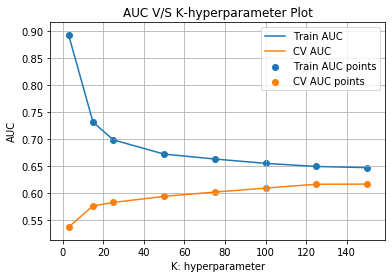

In [63]:
from matplotlib import pyplot as plt
plt.plot(k_value, train_auc, label='Train AUC')
plt.plot(k_value, cv_auc, label='CV AUC')
plt.scatter(k_value, train_auc, label='Train AUC points')
plt.scatter(k_value, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S K-hyperparameter Plot")
plt.grid()
plt.show()

In [64]:
print(train_auc)
print(cv_auc)

[0.8917097266845321, 0.7306448625307327, 0.6979341827768967, 0.6716125139326201, 0.6625007739426951, 0.6545174113521478, 0.6486916774556193, 0.64653067618161]
[0.5367720226223178, 0.575749179100448, 0.5821609318904739, 0.5934003226651376, 0.6012820447790603, 0.6086978317286953, 0.6158452167125533, 0.6160274789508069]


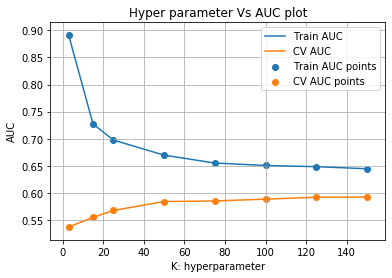

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.160656,0.051936,96.333085,1.417245,3,{'n_neighbors': 3},0.536771,0.539519,0.535084,0.537125,0.001828,8,0.891419,0.889493,0.892697,0.891203,0.001317
1,2.165203,0.039265,91.363952,1.233798,15,{'n_neighbors': 15},0.547994,0.550691,0.565740,0.554808,0.007808,7,0.730666,0.729616,0.721590,0.727291,0.004054
2,2.138861,0.014955,96.024269,2.298638,25,{'n_neighbors': 25},0.566318,0.563445,0.572877,0.567547,0.003947,6,0.702628,0.700895,0.689349,0.697624,0.005894
3,2.116945,0.044146,92.873706,4.390546,50,{'n_neighbors': 50},0.580954,0.583931,0.587264,0.584050,0.002577,5,0.671190,0.675400,0.662465,0.669685,0.005387
4,2.133685,0.061216,93.891789,4.107648,75,{'n_neighbors': 75},0.583560,0.585340,0.586410,0.585103,0.001175,4,0.656618,0.659029,0.649680,0.655109,0.003963


In [65]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm='brute')
parameters = {'n_neighbors':[3, 15, 25, 50,75,100,125,150]}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, Y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score']
K = results['param_n_neighbors']
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()
results.head()

In [66]:
print('Best Params: ', clf.best_params_)

Best Params:  {'n_neighbors': 150}


In [67]:
best_k = 150

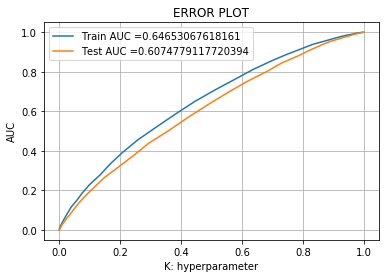

In [68]:
from sklearn.metrics import roc_curve, auc
neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute')
neigh.fit(X_tr, Y_train)
y_train_pred = batch_predict(neigh, X_tr)
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
plt.grid()
plt.show()


In [69]:
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.36239750759137696 for threshold 0.827


Text(0.5, 1, 'Test Confusion Matrix')

<Figure size 720x504 with 0 Axes>

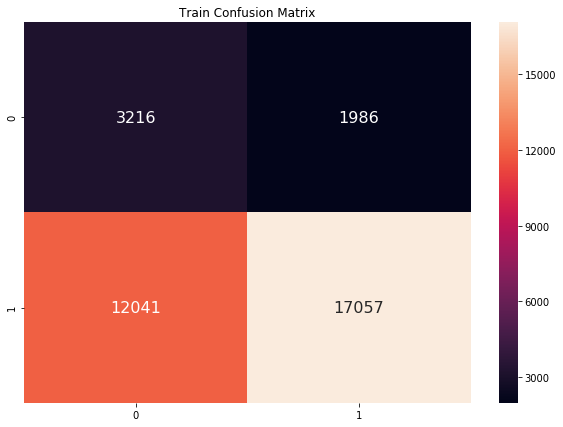

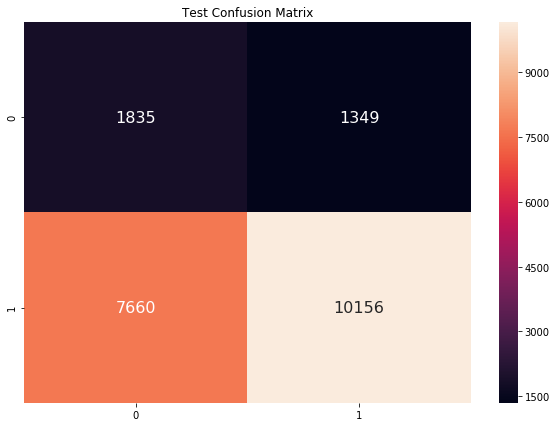

In [70]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cma = confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t))
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Train Confusion Matrix')
cma = confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Test Confusion Matrix')


### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [71]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,X_train_essay_tfidf,X_train_project_title_tfidf)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,X_cv_essay_tfidf,X_cv_project_title_tfidf)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,X_test_essay_tfidf,X_test_project_title_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(34300, 12638) (34300,)
(14700, 12638) (14700,)
(21000, 12638) (21000,)


In [72]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
k_value = [3, 15, 25, 50, 75, 100,125,150]
train_auc = list()
cv_auc = list()
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    neigh.fit(X_tr, Y_train)
    Y_probs_tr = neigh.predict_proba(X_tr)
    Y_probs_cr = neigh.predict_proba(X_cr)
    Y_probs_tr = Y_probs_tr[:, 1]
    Y_probs_cr = Y_probs_cr[:, 1]
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cr))

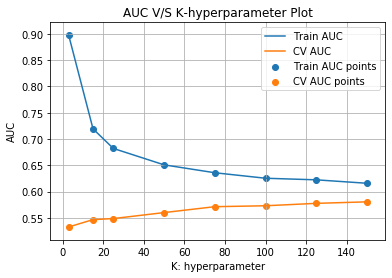

In [74]:
from matplotlib import pyplot as plt
plt.plot(k_value, train_auc, label='Train AUC')
plt.plot(k_value, cv_auc, label='CV AUC')
plt.scatter(k_value, train_auc, label='Train AUC points')
plt.scatter(k_value, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S K-hyperparameter Plot")
plt.grid()
plt.show()

In [75]:
print(train_auc)
print(cv_auc)

[0.897440542769084, 0.719240987032671, 0.6820457569455528, 0.650831224364263, 0.6358026082377524, 0.6253561655875599, 0.6223287448804501, 0.6157924437242913]
[0.5327166923179228, 0.5466589711099693, 0.5486583696967452, 0.5600593916243694, 0.5712639775602861, 0.5730187889650064, 0.5776136752114613, 0.5804868641142471]


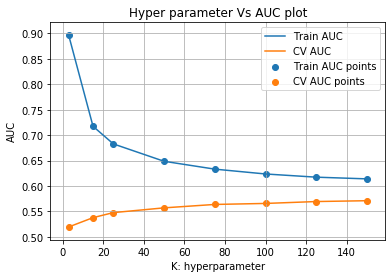

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.985444,0.056086,86.356766,0.127412,3,{'n_neighbors': 3},0.520966,0.529060,0.508576,0.519534,0.008424,8,0.896734,0.896318,0.896924,0.896659,0.000253
1,1.941472,0.005903,86.861121,0.158774,15,{'n_neighbors': 15},0.548864,0.537962,0.526707,0.537845,0.009046,7,0.713038,0.716265,0.723020,0.717441,0.004159
2,1.993772,0.059400,86.760516,0.166181,25,{'n_neighbors': 25},0.551666,0.549063,0.542530,0.547753,0.003843,6,0.678350,0.683924,0.686295,0.682856,0.003330
3,1.947134,0.012543,86.706883,0.248336,50,{'n_neighbors': 50},0.561956,0.552039,0.557267,0.557087,0.004051,5,0.643737,0.651576,0.650661,0.648658,0.003500
4,1.973452,0.039518,86.544316,0.027507,75,{'n_neighbors': 75},0.566525,0.559212,0.565696,0.563811,0.003270,4,0.632513,0.633656,0.633495,0.633221,0.000505


In [76]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm='brute')
parameters = {'n_neighbors':[3, 15, 25, 50, 75, 100,125,150]}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, Y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score']
K = results['param_n_neighbors']
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()
results.head()

In [80]:
print('Best Params: ', clf.best_params_)

Best Params:  {'n_neighbors': 150}


In [81]:
best_k = 150

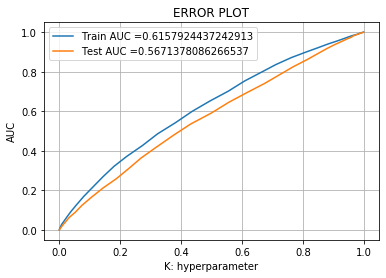

In [82]:
from sklearn.metrics import roc_curve, auc
neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute')
neigh.fit(X_tr, Y_train)
y_train_pred = batch_predict(neigh, X_tr)
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
plt.grid()
plt.show()


In [83]:
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.3379508148483578 for threshold 0.847


Text(0.5, 1, 'Test Confusion Matrix')

<Figure size 720x504 with 0 Axes>

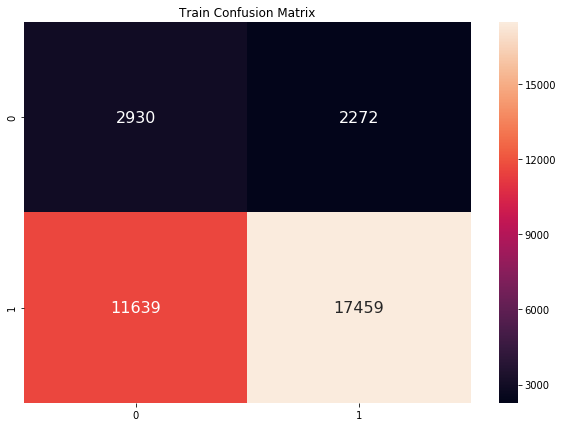

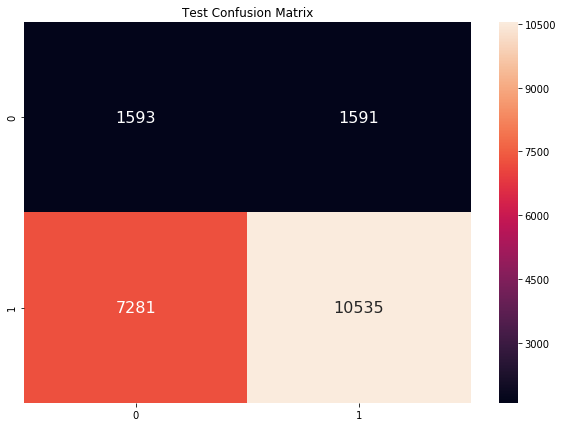

In [84]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cma = confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t))
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Train Confusion Matrix')
cma = confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Test Confusion Matrix')


### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [45]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_teacher_prefix,X_train_grade,X_train_price,X_train_prev_project_norm,X_tr_essay_avg_w2v,X_tr_title_avg_w2v)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_teacher_prefix,X_cv_grade,X_cv_price,X_cv_prev_project_norm,X_cv_essay_avg_w2v,X_cv_title_avg_w2v)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_teacher_prefix,X_test_grade,X_test_price,X_test_prev_project_norm,X_te_essay_avg_w2v,X_te_title_avg_w2v)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(34300, 701) (34300,)
(14700, 701) (14700,)
(21000, 701) (21000,)


In [46]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
k_value = [15,25,50,75,100,125,150]
train_auc = list()
cv_auc = list()
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute',n_jobs=-1)
    neigh.fit(X_tr, Y_train)
    Y_probs_tr = neigh.predict_proba(X_tr)
    Y_probs_cr = neigh.predict_proba(X_cr)
    Y_probs_tr = Y_probs_tr[:, 1]
    Y_probs_cr = Y_probs_cr[:, 1]
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cr))

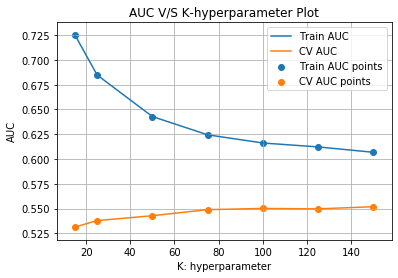

In [48]:
from matplotlib import pyplot as plt
plt.plot(k_value, train_auc, label='Train AUC')
plt.plot(k_value, cv_auc, label='CV AUC')
plt.scatter(k_value, train_auc, label='Train AUC points')
plt.scatter(k_value, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S K-hyperparameter Plot")
plt.grid()
plt.show()

In [49]:
print(train_auc)
print(cv_auc)

[0.7250068237764392, 0.6848027205205527, 0.6428659039205408, 0.6244548840494448, 0.6161855094989954, 0.6122430460703807, 0.6068035105697119]
[0.5314807518089792, 0.5379070201053974, 0.542827668850324, 0.5489446687243071, 0.5501533949071402, 0.5497284161344943, 0.55192880142316]


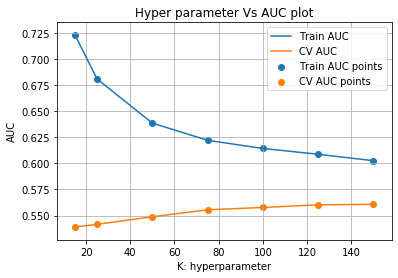

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.546862,0.022097,27.122725,0.153266,15,{'n_neighbors': 15},0.533896,0.539368,0.544069,0.539111,0.004157,7,0.724129,0.721967,0.722461,0.722852,0.000925
1,0.611227,0.089803,28.317484,1.228112,25,{'n_neighbors': 25},0.540663,0.539538,0.544577,0.541593,0.002160,6,0.683280,0.679785,0.679370,0.680812,0.001753
2,0.639471,0.062909,29.157343,0.212841,50,{'n_neighbors': 50},0.562223,0.542905,0.541541,0.548890,0.009445,5,0.634385,0.637271,0.644049,0.638568,0.004050
3,0.616021,0.024605,29.027509,0.301248,75,{'n_neighbors': 75},0.565405,0.552851,0.548423,0.555560,0.007193,4,0.618671,0.621312,0.626392,0.622125,0.003204
4,0.668925,0.009172,29.262589,0.154867,100,{'n_neighbors': 100},0.563193,0.556868,0.553331,0.557798,0.004080,3,0.611151,0.610725,0.621046,0.614308,0.004768


In [50]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm='brute')
parameters = {'n_neighbors':[15, 25, 50,75,100,125,150]}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True,n_jobs=-1)
clf.fit(X_tr, Y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score']
K = results['param_n_neighbors']
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()
results.head()

In [51]:
print('Best Params: ', clf.best_params_)

Best Params:  {'n_neighbors': 150}


In [52]:
best_k = 150

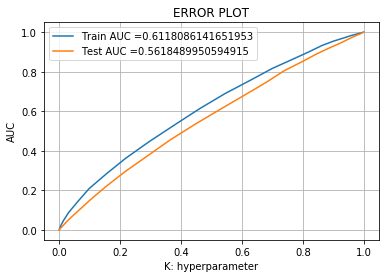

In [78]:
from sklearn.metrics import roc_curve, auc
neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute',n_jobs=-1)
neigh.fit(X_tr, Y_train)
y_train_pred = batch_predict(neigh, X_tr)
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
plt.grid()
plt.show()


In [79]:
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.33066293704904043 for threshold 0.85


Text(0.5, 1, 'Test Confusion Matrix')

<Figure size 720x504 with 0 Axes>

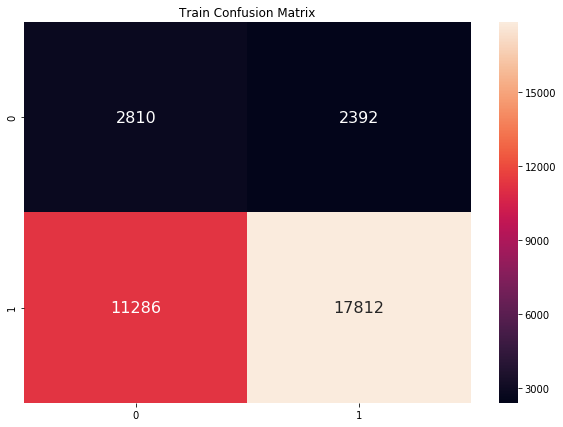

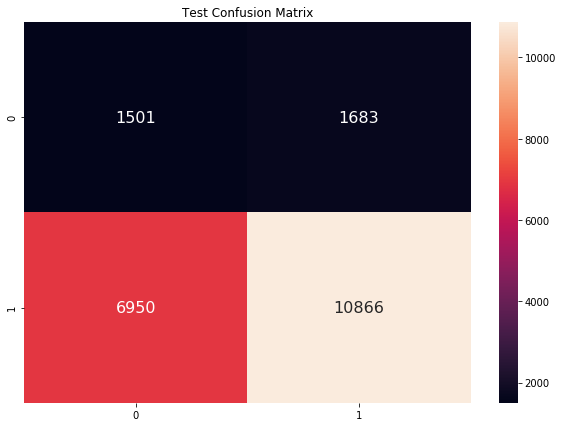

In [80]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cma = confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t))
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Train Confusion Matrix')
cma = confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Test Confusion Matrix')


### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [68]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_teacher_prefix,X_train_grade,X_train_price,X_train_prev_project_norm,X_tr_tfidf_w2v_vectors,X_train_project_title_tfidf_w2v)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_teacher_prefix,X_cv_grade,X_cv_price,X_cv_prev_project_norm,X_cv_tfidf_w2v_vectors,X_cv_project_title_tfidf_w2v)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_teacher_prefix,X_test_grade,X_test_price,X_test_prev_project_norm,X_te_tfidf_w2v_vectors,X_test_project_title_tfidf_w2v)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(34300, 701) (34300,)
(14700, 701) (14700,)
(21000, 701) (21000,)


In [69]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
k_value = [15,25,50,75,100,125,150]
train_auc = list()
cv_auc = list()
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute',n_jobs=-1)
    neigh.fit(X_tr, Y_train)
    Y_probs_tr = neigh.predict_proba(X_tr)
    Y_probs_cr = neigh.predict_proba(X_cr)
    Y_probs_tr = Y_probs_tr[:, 1]
    Y_probs_cr = Y_probs_cr[:, 1]
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cr))

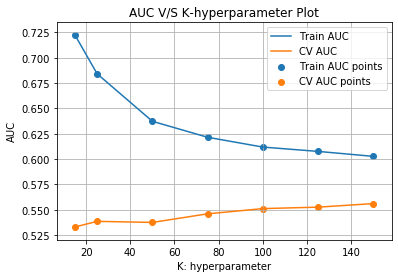

In [71]:
from matplotlib import pyplot as plt
plt.plot(k_value, train_auc, label='Train AUC')
plt.plot(k_value, cv_auc, label='CV AUC')
plt.scatter(k_value, train_auc, label='Train AUC points')
plt.scatter(k_value, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S K-hyperparameter Plot")
plt.grid()
plt.show()

In [72]:
print(train_auc)
print(cv_auc)

[0.7223530459543719, 0.684163314368401, 0.637274714629524, 0.6214832546019233, 0.6118086141651953, 0.6075319878476662, 0.6026260698147445]
[0.532915754411158, 0.53844878844806, 0.5373938690745931, 0.5458906565430092, 0.5510459996217694, 0.552484042026402, 0.5560034497620843]


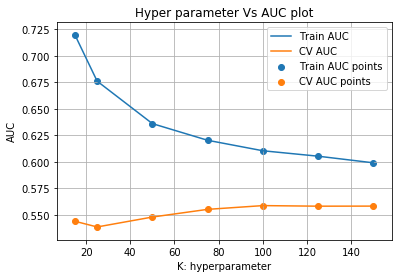

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.515612,0.012758,26.120856,0.296546,15,{'n_neighbors': 15},0.542940,0.542943,0.546104,0.543996,0.001491,6,0.721957,0.717247,0.718760,0.719321,0.001963
1,0.510889,0.020608,26.708725,0.301994,25,{'n_neighbors': 25},0.545030,0.532258,0.538679,0.538656,0.005214,7,0.675666,0.675726,0.676593,0.675995,0.000424
2,0.546846,0.024703,26.900368,0.130026,50,{'n_neighbors': 50},0.555260,0.549839,0.538904,0.548001,0.006803,5,0.634399,0.634844,0.638715,0.635986,0.001938
3,0.570906,0.009175,27.314007,0.315008,75,{'n_neighbors': 75},0.563878,0.554372,0.547463,0.555238,0.006730,4,0.620521,0.617629,0.622732,0.620294,0.002090
4,0.679825,0.085329,27.987660,0.430048,100,{'n_neighbors': 100},0.562955,0.559354,0.554005,0.558771,0.003677,1,0.609439,0.607186,0.614649,0.610425,0.003125


In [73]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm='brute')
parameters = {'n_neighbors':[15, 25, 50,75,100,125,150]}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True,n_jobs=-1)
clf.fit(X_tr, Y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score']
K = results['param_n_neighbors']
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()
results.head()

In [74]:
print('Best Params: ', clf.best_params_)

Best Params:  {'n_neighbors': 100}


In [75]:
best_k = 100

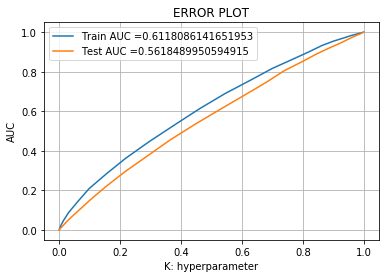

In [81]:
from sklearn.metrics import roc_curve, auc
neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute',n_jobs=-1)
neigh.fit(X_tr, Y_train)
y_train_pred = batch_predict(neigh, X_tr)
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
plt.grid()
plt.show()


In [82]:
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.33066293704904043 for threshold 0.85


Text(0.5, 1, 'Test Confusion Matrix')

<Figure size 720x504 with 0 Axes>

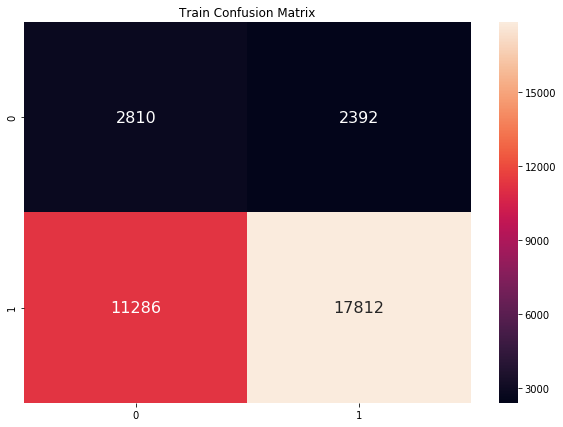

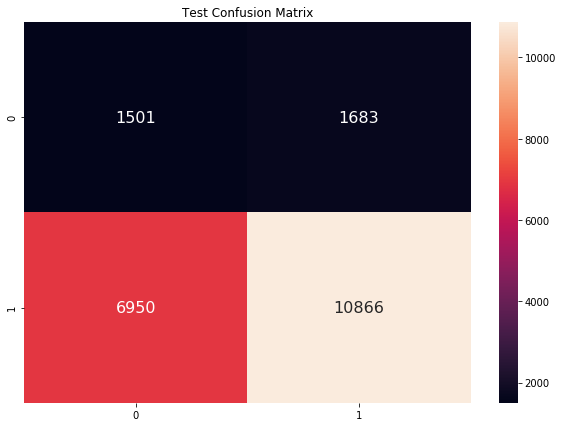

In [83]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cma = confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t))
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Train Confusion Matrix')
cma = confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Test Confusion Matrix')


<h2>2.5 Feature selection with `SelectKBest` </h2>

In [84]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,X_train_essay_bow,X_train_project_title_bow)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,X_cv_essay_bow,X_cv_project_title_bow)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,X_test_essay_bow,X_test_project_title_bow)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)


Final Data matrix
(34300, 12648) (34300,)
(14700, 12648) (14700,)
(21000, 12648) (21000,)


In [85]:
X_tr = X_tr.toarray() 
X_cr = X_cr.toarray() 
X_te = X_te.toarray()

In [86]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
skb = SelectKBest(chi2, k=2000).fit(X_tr, Y_train)
X_tr = skb.transform(X_tr)
X_cr = skb.transform(X_cr)
X_te = skb.transform(X_te)
print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(34300, 2000) (34300,)
(14700, 2000) (14700,)
(21000, 2000) (21000,)


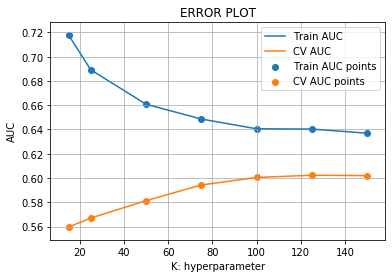

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
k_value = [15,25,50,75,100,125,150]
train_auc = list()
cv_auc = list()
for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors=i, algorithm='brute',n_jobs=-1)
    neigh.fit(X_tr, Y_train)
    Y_probs_tr = neigh.predict_proba(X_tr)
    Y_probs_cr = neigh.predict_proba(X_cr)
    Y_probs_tr = Y_probs_tr[:, 1]
    Y_probs_cr = Y_probs_cr[:, 1]
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cr))
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
plt.grid()
plt.show()

## RandomizedSearchCV:

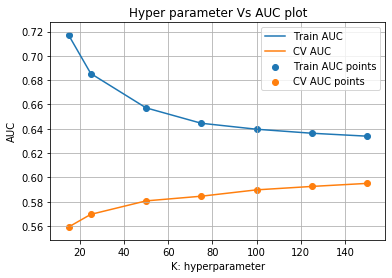

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.585260,0.101856,61.110725,0.197571,15,{'n_neighbors': 15},0.566587,0.551548,0.559777,0.559305,0.006149,7,0.714336,0.718740,0.717918,0.716998,0.001912
1,4.419905,0.697875,59.894032,0.844974,25,{'n_neighbors': 25},0.579697,0.561208,0.568061,0.569656,0.007632,6,0.680922,0.686153,0.689262,0.685446,0.003441
2,4.134221,0.191561,62.409467,4.196320,50,{'n_neighbors': 50},0.594627,0.569629,0.577947,0.580735,0.010394,5,0.652133,0.658061,0.661526,0.657240,0.003878
3,3.877186,0.050910,68.661758,0.060796,75,{'n_neighbors': 75},0.596131,0.574264,0.583373,0.584589,0.008969,4,0.639252,0.644790,0.649657,0.644566,0.004251
4,4.492570,0.090728,68.553826,0.282786,100,{'n_neighbors': 100},0.597524,0.580837,0.591057,0.589807,0.006870,3,0.633359,0.638048,0.647567,0.639658,0.005911


In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm='brute')
parameters = {'n_neighbors':[15, 25, 50,75,100,125,150]}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True,n_jobs=-1)
clf.fit(X_tr, Y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score']
K = results['param_n_neighbors']
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()
results.head()

In [90]:
clf.best_params_

{'n_neighbors': 150}

In [91]:
best_k=150

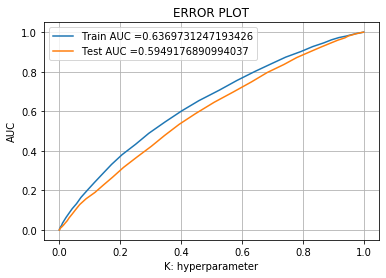

In [92]:
from sklearn.metrics import roc_curve, auc
neigh = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute',n_jobs=-1)
neigh.fit(X_tr, Y_train)
y_train_pred = batch_predict(neigh, X_tr)
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
plt.grid()
plt.show()


the maximum value of tpr*(1-fpr) 0.35995541614413157 for threshold 0.807


Text(0.5, 1, 'Test Confusion Matrix')

<Figure size 720x504 with 0 Axes>

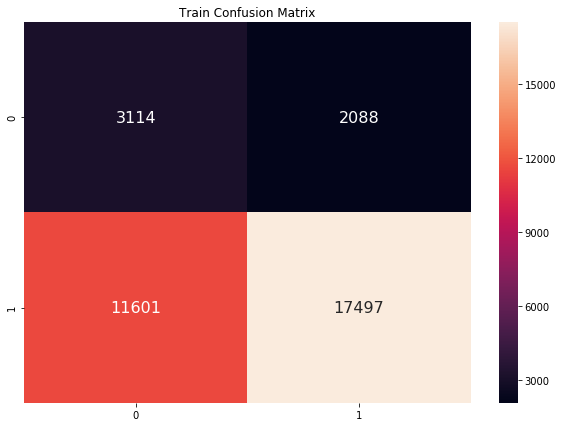

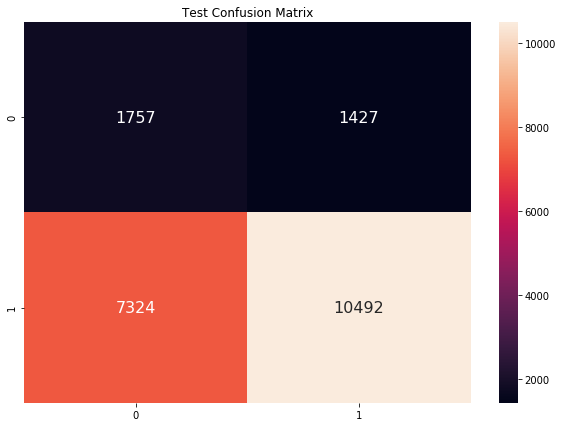

In [93]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cma = confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t))
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Train Confusion Matrix')
cma = confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Test Confusion Matrix')

<h1>3. Conclusions</h1>

In [96]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter K", "Train AUC", "Test AUC"]
x.add_row(["BOW", "Brute", 150, 0.6465, 0.6074])
x.add_row(["TFIDF", "Brute", 150, 0.6157 ,0.5671])
x.add_row(["AVG W2V", "Brute", 150, 0.6118, 0.5618])
x.add_row(["TFIDF W2V", "Brute", 100, 0.611 ,0.5618])
x.add_row(["BOW Top 2000", "Brute", 150, 0.6369, 0.5949])
print(x)

+--------------+-------+-------------------+-----------+----------+
|  Vectorizer  | Model | Hyper Parameter K | Train AUC | Test AUC |
+--------------+-------+-------------------+-----------+----------+
|     BOW      | Brute |        150        |   0.6465  |  0.6074  |
|    TFIDF     | Brute |        150        |   0.6157  |  0.5671  |
|   AVG W2V    | Brute |        150        |   0.6118  |  0.5618  |
|  TFIDF W2V   | Brute |        100        |   0.611   |  0.5618  |
| BOW Top 2000 | Brute |        150        |   0.6369  |  0.5949  |
+--------------+-------+-------------------+-----------+----------+
